<a href="https://colab.research.google.com/github/SyahrulBhudiF/PCVK_GANJIL_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**

**Nama    : Syahrul Bhudi Ferdiansyah**<br>
**Kelas   : TI - 3B**<br>

## **TUGAS PRAKTIKUM**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [2]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


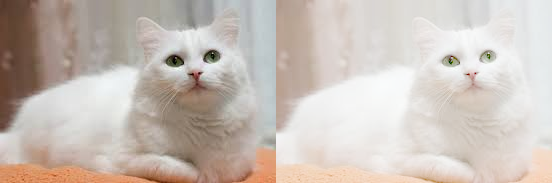

In [3]:
original_img = cv2.imread('/content/drive/MyDrive/pcvk/download.jpeg')

def gamma_correction(image, gamma):
  invGamma = 1.0/gamma
  table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
  return cv2.LUT(image, table)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

gamma_img = gamma_correction(original_img, gamma)

cv2_imshow(cv2.hconcat([original_img, gamma_img]))

2. Buat Simulasi Image Depth

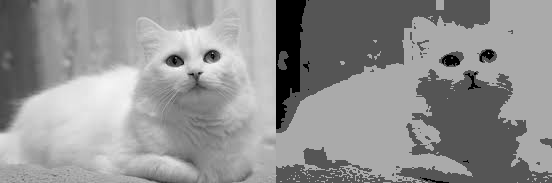

In [4]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
gray_image = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
depth_image = np.zeros(gray_image.shape, gray_image.dtype)
depth_image = (np.floor(gray_image / level) * level).astype('uint8')
cv2_imshow(cv2.hconcat([gray_image, depth_image]))

3. Buat modul Average Denoising

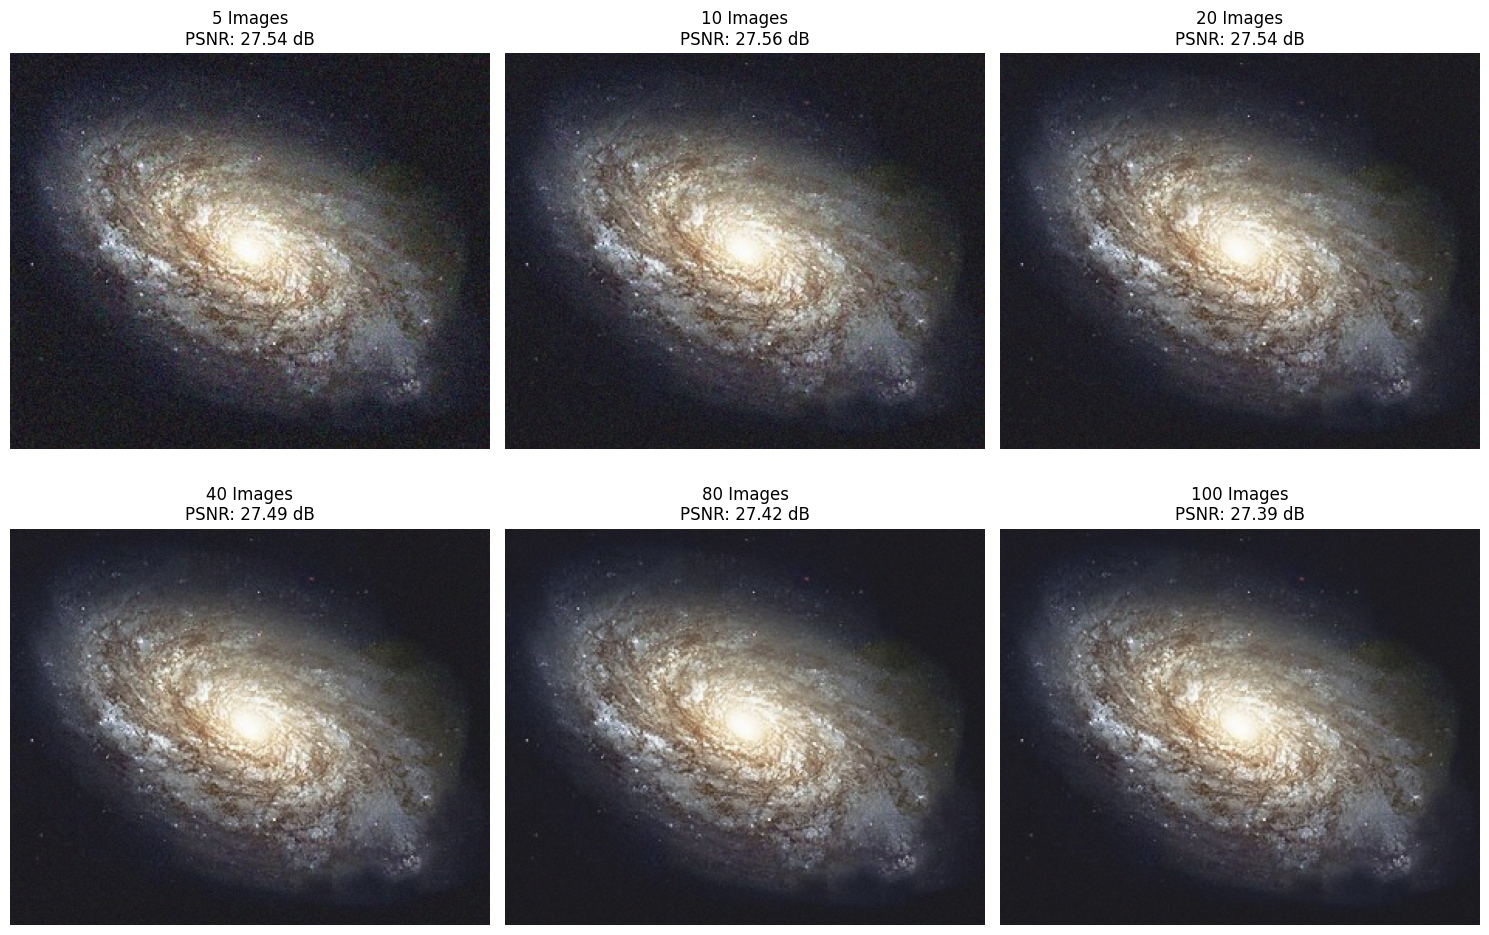

In [5]:
import glob
from math import log10, sqrt
import matplotlib.pyplot as plt


original_img = cv2.imread('/content/drive/MyDrive/pcvk/Assets/galaxy.jpg')


# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/Assets/noises/*.jpg'):
 n= cv2.imread(img)

 cv_img.append(n)


rows = 2
cols = 3

test_images_counts = [5, 10, 20, 40, 80, 100]
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

for index, num_images in enumerate(test_images_counts):
    average_img = np.zeros(cv_img[0].shape, np.float32)

    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv2.convertScaleAbs(denoised_img)

    psnr_value = PSNR(original_img, denoised_img)

    row = index // cols
    col = index % cols

    axs[row, col].imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(f'{num_images} Images\nPSNR: {psnr_value:.2f} dB')
    axs[row, col].axis('off')

for idx in range(len(test_images_counts), rows * cols):
    row = idx // cols
    col = idx % cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()



Secara gambar memang makin banyak image yang digunakan maka semakin berkurang noise warnanya

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),sedangkan image paling kanan adalah hasilnya:

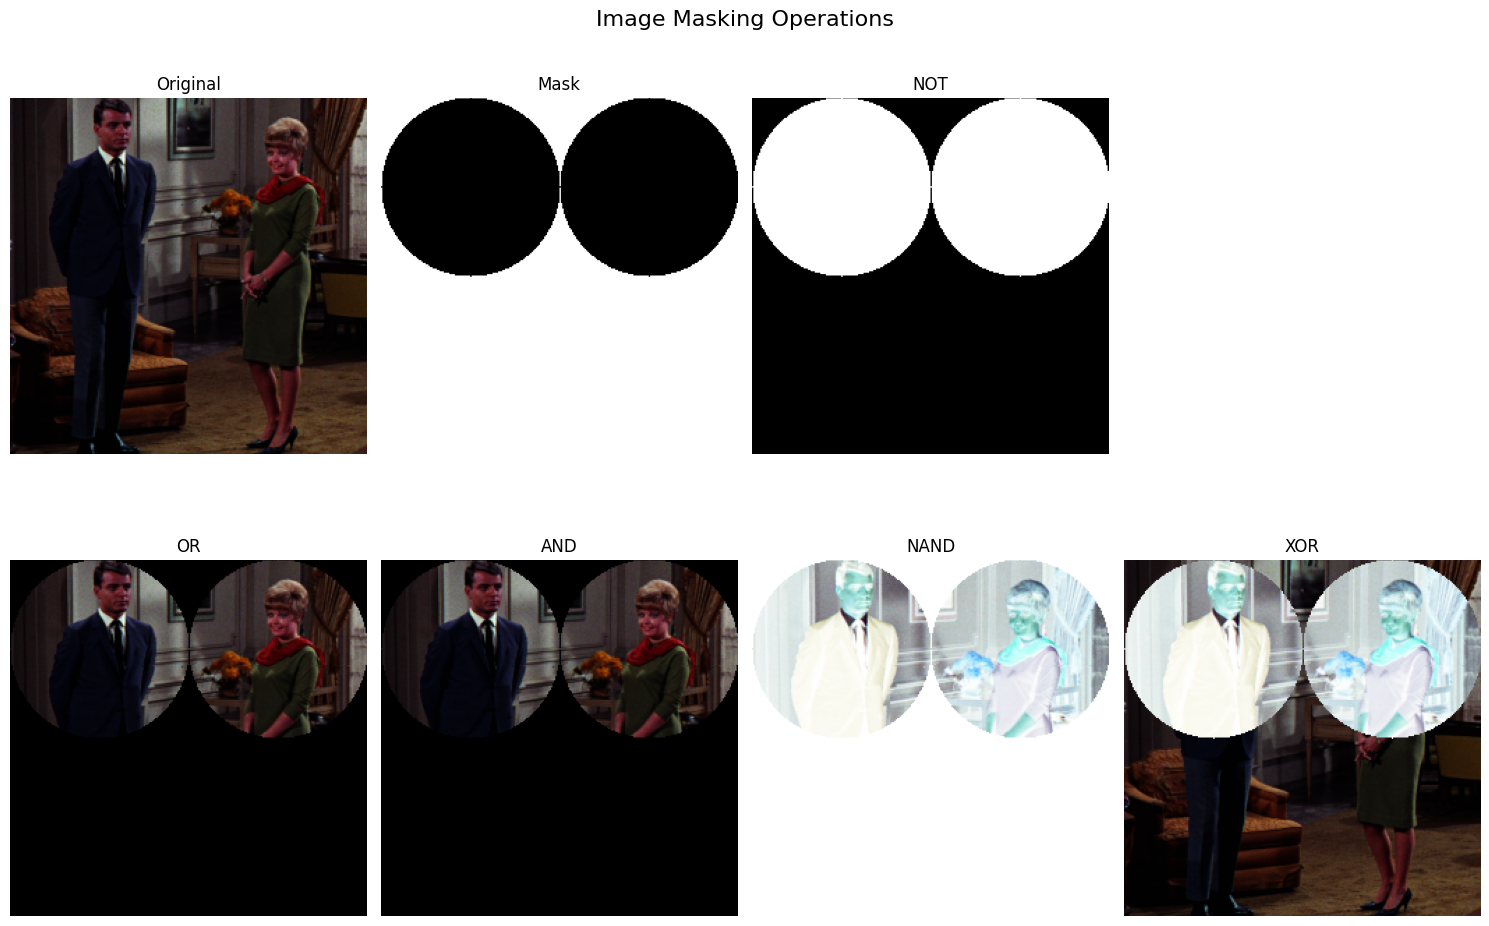

In [38]:
img = cv2.imread('/content/drive/MyDrive/pcvk/Assets/couple.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Buat mask
mask = np.ones(img.shape[:2], dtype=np.uint8) * 255
cv2.circle(mask, (img.shape[1]//4, img.shape[0]//4), min(img.shape[0]//4, img.shape[1]//4), 0, -1)
cv2.circle(mask, (3*img.shape[1]//4, img.shape[0]//4), min(img.shape[0]//4, img.shape[1]//4), 0, -1)

# NOT
not_result = cv2.bitwise_not(mask)

# OR
or_result = cv2.bitwise_or(img, img, mask=cv2.bitwise_not(mask))

# AND
and_result = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

# NAND
nand_result = cv2.bitwise_not(cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))

# XOR
xor_result = cv2.bitwise_xor(img, cv2.cvtColor(cv2.bitwise_not(mask), cv2.COLOR_GRAY2RGB))

# Persiapkan plot
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Image Masking Operations', fontsize=16)

# Tampilkan hasil
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(mask, cmap='gray')
axs[0, 1].set_title('Mask')
axs[0, 2].imshow(not_result, cmap='gray')
axs[0, 2].set_title('NOT')
axs[1, 0].imshow(or_result)
axs[1, 0].set_title('OR')
axs[1, 1].imshow(and_result)
axs[1, 1].set_title('AND')
axs[1, 2].imshow(nand_result)
axs[1, 2].set_title('NAND')
axs[1, 3].imshow(xor_result)
axs[1, 3].set_title('XOR')

# Hapus axis
for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

- Mask akan menampilkan dua lingkaran hitam pada background putih.
- NOT tidak akan menampilkan gambar
- AND akan menampilkan gambar asli hanya di dalam lingkaran hitam.
- OR akan menampilkan gambar asli di luar lingkaran hitam.
- NAND akan menampilkan inversi dari AND.
- XOR akan menampilkan inversi gambar di dalam lingkaran dan gambar asli di luar.